# Butterflies and Moths Classification
### 1. Introduction
This notebook demonstrates a deep learning model using the Xception architecture to classify butterfly and moth species. The dataset contains 13,594 pictures of 100 species of butterfly or moth species. All images are 244x244x3 in jpg format. We will train the model, evaluate its performance, and visualize the results.

### 2. Import libraries

In [5]:
import pandas as pd
import numpy as np
import cv2
from sklearn.utils import shuffle
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### 3. Load and process data

In [6]:
data_info = pd.read_csv("C:/Users/Lenovo/PycharmProjects/MachineLearning/Kyushu Projects\ButterflyClassification/butterflies and moths.csv", encoding='utf-8')

X_train, y_train = [], []
X_valid, y_valid = [], []

for i in range(len(data_info)):
    image_path = "C:/Users/Lenovo/PycharmProjects/MachineLearning/Kyushu Projects\ButterflyClasification/data set/" + data_info["filepaths"][i]
    image = cv2.imread(image_path)
    class_id = data_info["class id"][i]
    data_set = data_info["data set"][i]

    if image is not None:
        if data_set == "train":
            X_train.append(image)
            y_train.append(class_id)
        elif data_set in ["valid", "test"]:
            X_valid.append(image)
            y_valid.append(class_id)
            
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_train, y_train = shuffle(X_train, y_train, random_state=42)

X_train = X_train / 255.0
X_valid = X_valid / 255.0

Top 30 species with the most images 

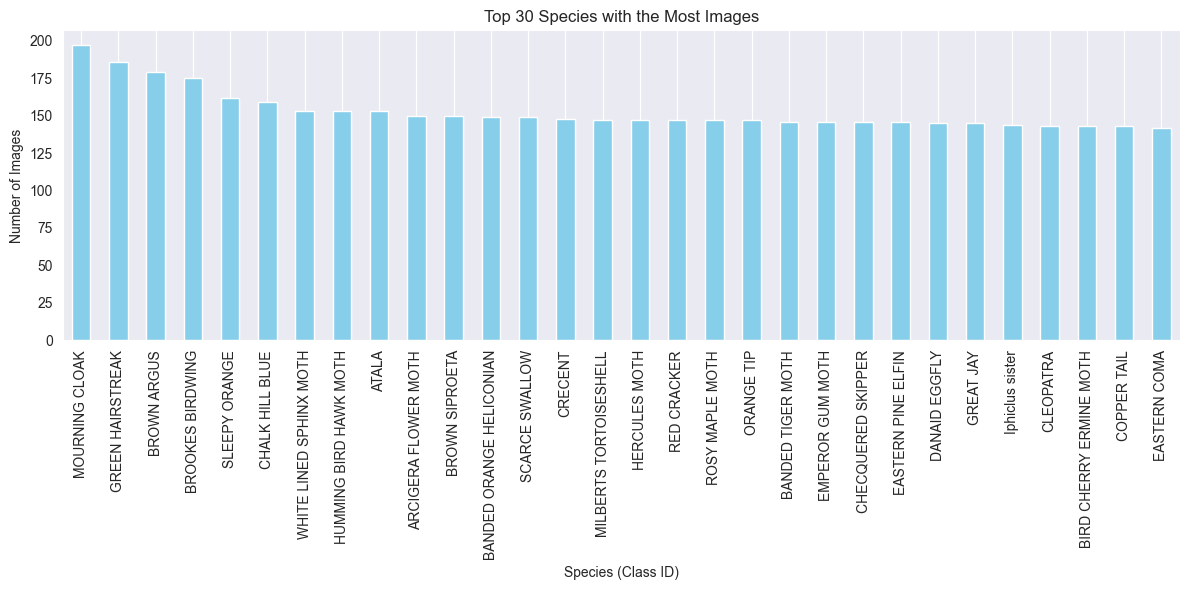

In [7]:
species_counts = data_info['labels'].value_counts()

top_10_species = species_counts.head(30)

plt.figure(figsize=(12, 6))
top_10_species.plot(kind='bar', color='skyblue')
plt.title('Top 30 Species with the Most Images')
plt.xlabel('Species (Class ID)')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 4. Display random examples 

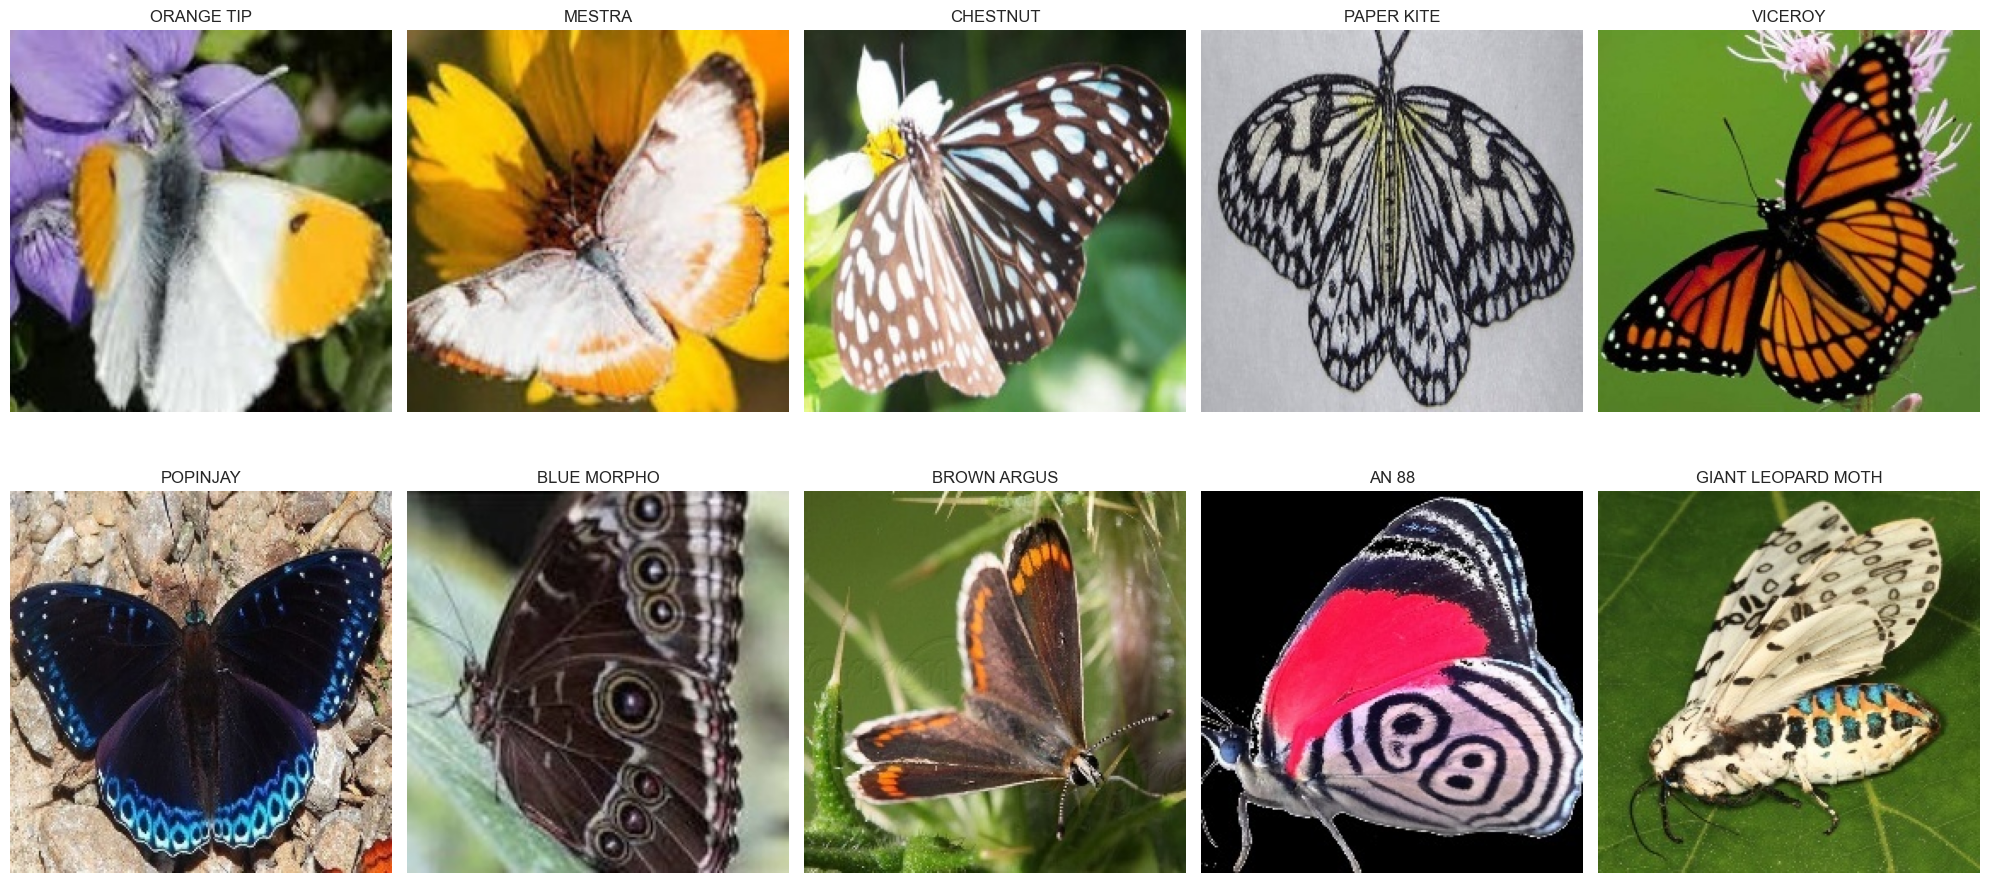

In [10]:
species = ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HAWK MOTH', 'INDRA SWALLOW', 'IO MOTH', 'Iphiclus sister', 'JULIA', 'LARGE MARBLE', 'LUNA MOTH', 'MADAGASCAN SUNSET MOTH', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'OLEANDER HAWK MOTH', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POLYPHEMUS MOTH', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRAL', 'RED CRACKER', 'RED POSTMAN', 'RED SPOTTED PURPLE', 'ROSY MAPLE MOTH', 'SCARCE SWALLOW', 'SILVER SPOT SKIPPER', 'SIXSPOT BURNET MOTH', 'SLEEPY ORANGE', 'SOOTYWING', 'SOUTHERN DOGFACE', 'STRAITED QUEEN', 'TROPICAL LEAFWING', 'TWO BARRED FLASHER', 'ULYSES', 'VICEROY', 'WHITE LINED SPHINX MOTH', 'WOOD SATYR', 'YELLOW SWALLOW TAIL', 'ZEBRA LONG WING']

plt.figure(figsize=(20, 10))
for i in range(10):
    img = X_train[i]
    img = (img * 255).astype(np.uint8)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img_rgb)
    plt.title(species[y_train[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

### 5. Model creation

In [5]:
BATCH_SIZE = 32
EPOCHS = 15
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 100

input_tensor = Input(shape=INPUT_SHAPE)
base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

bm_output = base_model.output
x = GlobalAveragePooling2D()(bm_output)
x = Dense(1024, activation='relu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

xception_model = Model(inputs=input_tensor, outputs=output)

xception_model.summary()

83683744/83683744 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                      

 2D)                                                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
          

                                                                                                  
 block7_sepconv1_act (Activatio  (None, 14, 14, 728)  0          ['add_4[0][0]']                  
 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_se

 2D)                                                                                              
                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
          

 block12_sepconv2_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv2[0][0]']       
 alization)                                                                                       
                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization

### 6. Model Compilation and Callbacks

In [6]:
xception_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
early_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)
xception_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
early_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

### 7. Training

In [7]:
history = xception_model.fit(X_train, y_train,
                             epochs=EPOCHS,
                             validation_data=(X_valid, y_valid),
                             callbacks=[rlr_cb, early_cb])

Epoch 1/15
394/394 [==============================] - 1717s 4s/step - loss: 1.9964 - accuracy: 0.5090 - val_loss: 0.7860 - val_accuracy: 0.7660 - lr: 0.0010
Epoch 2/15
394/394 [==============================] - 1550s 4s/step - loss: 0.6576 - accuracy: 0.8203 - val_loss: 0.5953 - val_accuracy: 0.8460 - lr: 0.0010
Epoch 3/15
394/394 [==============================] - 1486s 4s/step - loss: 0.4201 - accuracy: 0.8826 - val_loss: 0.7086 - val_accuracy: 0.8360 - lr: 0.0010
Epoch 4/15
394/394 [==============================] - 1488s 4s/step - loss: 0.3529 - accuracy: 0.9024 - val_loss: 0.5032 - val_accuracy: 0.8690 - lr: 0.0010
Epoch 5/15
394/394 [==============================] - 1488s 4s/step - loss: 0.2842 - accuracy: 0.9208 - val_loss: 0.7220 - val_accuracy: 0.8690 - lr: 0.0010
Epoch 6/15
394/394 [==============================] - 1481s 4s/step - loss: 0.2549 - accuracy: 0.9295 - val_loss: 0.5406 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 7/15
394/394 [==============================] - ETA:

### 8. Evaluation

In [8]:
val_loss, val_accuracy = xception_model.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

32/32 [==============================] - 20s 616ms/step - loss: 0.2487 - accuracy: 0.9650
Validation accuracy: 96.50%


### 9. Predictions and Confusion Matrix

32/32 [==============================] - 20s 594ms/step


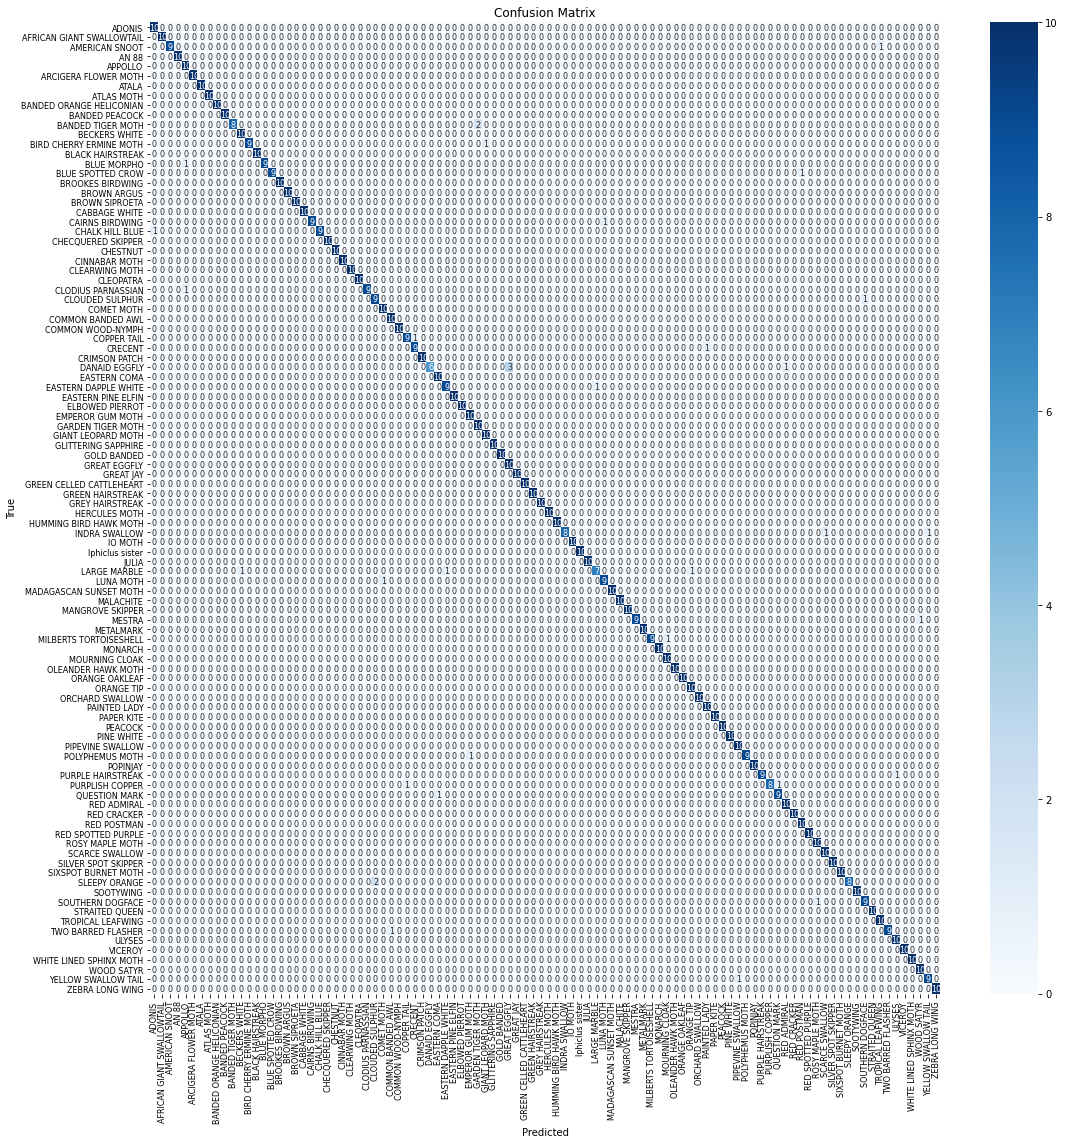

In [9]:
y_pred = np.argmax(xception_model.predict(X_valid), axis=1)
cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=True, 
                xticklabels=species, yticklabels=species, 
                fmt='g', annot_kws={"size": 8})

plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

### 10. Report

In [10]:
report = classification_report(y_valid, y_pred, target_names=[f'Class {i}' for i in range(NUM_CLASSES)])
print(report)

              precision    recall  f1-score   support

     Class 0       0.91      1.00      0.95        10
     Class 1       1.00      1.00      1.00        10
     Class 2       1.00      0.90      0.95        10
     Class 3       1.00      1.00      1.00        10
     Class 4       0.83      1.00      0.91        10
     Class 5       1.00      1.00      1.00        10
     Class 6       1.00      1.00      1.00        10
     Class 7       1.00      1.00      1.00        10
     Class 8       1.00      1.00      1.00        10
     Class 9       1.00      1.00      1.00        10
    Class 10       1.00      0.80      0.89        10
    Class 11       0.91      1.00      0.95        10
    Class 12       1.00      0.90      0.95        10
    Class 13       1.00      1.00      1.00        10
    Class 14       1.00      0.90      0.95        10
    Class 15       1.00      0.90      0.95        10
    Class 16       1.00      1.00      1.00        10
    Class 17       1.00    

### 11. Plot Accuracy and Loss

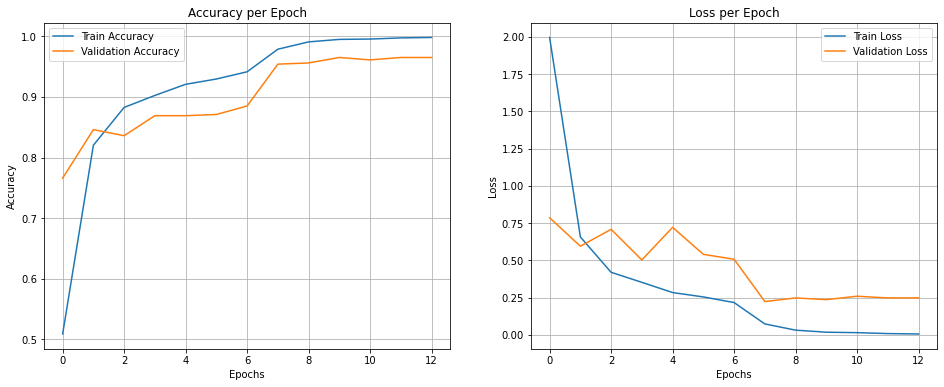

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy per Epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss per Epoch')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.savefig('training_performance.png')
plt.show()

### 12.Conclusion
The results indicate that the Xception model performs exceptionally well on the classification task, with a validation accuracy of \(97.5\%\) and no signs of overfitting. The confusion matrix highlights the model’s detailed classification performance, while the accuracy and loss graphs confirm effective learning and convergence. These findings underscore the model's robustness and generalization capability, suggesting that further refinements may focus on addressing specific class misclassifications or exploring additional improvements.